In [2]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [4]:
from alpha_vantage.timeseries import TimeSeries

In [5]:
api_key='5G0JE3N9M03JUP0X'

In [6]:
ts = TimeSeries(key=api_key, output_format="pandas")

data, meta_data = ts.get_daily(symbol="RELIANCE.BSE", outputsize="full")

# Save to CSV
data.to_csv("reliance_stock_data.csv")
# Inspect the data
print(data.head())

            1. open  2. high   3. low  4. close  5. volume
date                                                      
2024-12-10  1290.00  1295.00  1280.75   1284.95   438986.0
2024-12-09  1303.00  1315.45  1292.90   1295.15   554024.0
2024-12-06  1326.90  1326.90  1309.80   1311.80   412701.0
2024-12-05  1310.75  1329.50  1306.40   1321.20   674847.0
2024-12-04  1326.95  1329.00  1305.00   1309.00   438492.0


In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("reliance_stock_data.csv")
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2024-12-10,1290.00,1295.00,1280.75,1284.95,438986.0
1,2024-12-09,1303.00,1315.45,1292.90,1295.15,554024.0
2,2024-12-06,1326.90,1326.90,1309.80,1311.80,412701.0
3,2024-12-05,1310.75,1329.50,1306.40,1321.20,674847.0
4,2024-12-04,1326.95,1329.00,1305.00,1309.00,438492.0


In [9]:
df.count

<bound method DataFrame.count of             date    1. open    2. high     3. low   4. close   5. volume
0     2024-12-10  1290.0000  1295.0000  1280.7500  1284.9500    438986.0
1     2024-12-09  1303.0000  1315.4500  1292.9000  1295.1500    554024.0
2     2024-12-06  1326.9000  1326.9000  1309.8000  1311.8000    412701.0
3     2024-12-05  1310.7500  1329.5000  1306.4000  1321.2000    674847.0
4     2024-12-04  1326.9500  1329.0000  1305.0000  1309.0000    438492.0
...          ...        ...        ...        ...        ...         ...
4906  2005-01-07   359.8268   373.1158   359.5200   368.5838  33939690.0
4907  2005-01-06   357.7824   365.6194   356.1470   358.4298  26893035.0
4908  2005-01-05   358.1232   363.9158   351.8194   361.1214  33908532.0
4909  2005-01-04   364.5974   371.3782   360.8490   361.7348  20119886.0
4910  2005-01-03   354.4090   371.0712   354.4090   370.1174  23685843.0

[4911 rows x 6 columns]>

In [10]:
df1=df['1. open']
df1

0       1290.0000
1       1303.0000
2       1326.9000
3       1310.7500
4       1326.9500
          ...    
4906     359.8268
4907     357.7824
4908     358.1232
4909     364.5974
4910     354.4090
Name: 1. open, Length: 4911, dtype: float64

In [11]:
import matplotlib.pyplot as plt


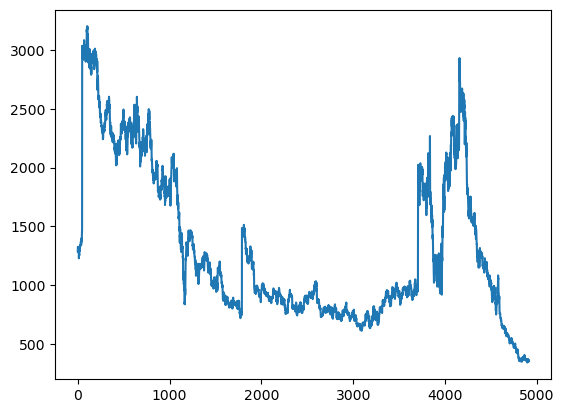

In [12]:
plt.plot(df1)

In [13]:
#LSTM work on scaled data so using min max scaler

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(4911, 1)

In [17]:
df1

array([[0.33117932],
       [0.33573114],
       [0.3440995 ],
       ...,
       [0.0048916 ],
       [0.00715848],
       [0.00359111]])

In [18]:
#splitting data into train test split

In [19]:
# In time series data the price of stock on a particular day depends on previous values too.
# So we must divide the data in such a way that we take a particular amount for say 70 percent into train data and rest into test data. No random selection. 

In [20]:
training_size=int(len(df1)*0.65)
test_size=len(df1) - training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(3192, 1719)

In [22]:
# timesteps= to calculate the next value how many previous values we have to consider is timesteps

In [23]:
#covert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [24]:
# reshape into x=t, t+1, t+2...
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape)

(3091, 100)


In [26]:
# reshaping the input into 3D as LSTM takes only that type of data , so adding 1 as the third dimension.
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.2 MB 4.6 MB/s eta 0:01:26
   ---------------------------------------- 0.5/390.2 MB 5.2 MB/s eta 0:01:15
   ---------------------------------------- 0.9/390.2 MB 5.9 MB/s eta 0:01:06
   ---------------------------------------- 1.3/390.2 MB 6.8 MB/s eta 0:00:58
   ---------------------------------------- 1.4/390.2 MB 6.0 MB/s eta 0:01:05
   ---------------------------------------- 1.8/390.2 MB 6.5 MB/s eta 0:01:00
   ---------------------------------------- 2.0/390.2 MB 6.8 MB/s eta 0:00:58
   ---------------------------------------- 2.5/390.2 MB 6.9 MB/s eta 0:00:56
   ---------------------------------------- 2.7/390.2 MB 6.6 MB/s eta 0:0

In [29]:
#creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64 , verbose=1)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 0.0529 - val_loss: 0.0024
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 8.0414e-04 - val_loss: 0.0019
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 7.4290e-04 - val_loss: 0.0018
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 7.0037e-04 - val_loss: 0.0018
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 7.8794e-04 - val_loss: 0.0017
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 6.3542e-04 - val_loss: 0.0018
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 6.3201e-04 - val_loss: 0.0015
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 5.6498e-04 - val_loss: 0.0015
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.9252e-04 - val_loss: 0.0013
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.8958e-04 - val_loss: 0.0013
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 5.1606e-04 - val_loss: 0.0012
Epoch 12/10

In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [35]:
#Calculating the RMSE performance metrices
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.011473165478834278

In [36]:
# transforming back to the original form , descaling
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
#for training data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1507.7886339253412

In [39]:
# for test data
math.sqrt(mean_squared_error(y_test,test_predict))

1352.118179498635

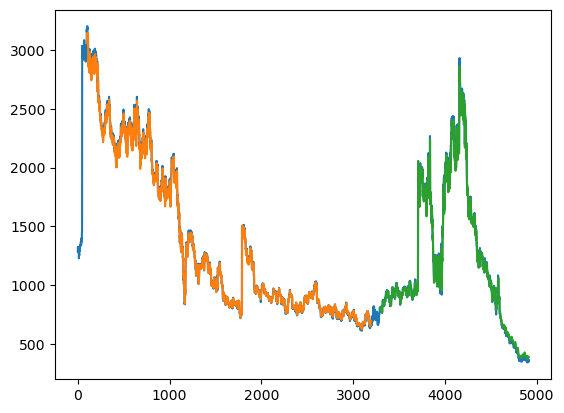

In [42]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

1719

In [47]:
x_input=test_data[1519:].reshape(1,-1)
x_input.shape

(1, 200)

In [48]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [49]:
temp_input

[0.05941567449715987,
 0.06446238812839172,
 0.06323346535493801,
 0.06490384514382577,
 0.06800587899736035,
 0.06681274057271483,
 0.06800587899736035,
 0.06812506678928115,
 0.07015343012241049,
 0.07273039343315882,
 0.06978361183267268,
 0.06872177605776364,
 0.07086932718281375,
 0.07165672291275357,
 0.06729005196503693,
 0.06740923975695776,
 0.05941567449715987,
 0.06037008719756448,
 0.06585832787231025,
 0.06371077674726011,
 0.06204039695837238,
 0.0620643465616843,
 0.061813786091947154,
 0.05607491491938438,
 0.05825825039324267,
 0.059296346649079346,
 0.057268123372109736,
 0.055359087887060954,
 0.054404745214736205,
 0.05392736379433424,
 0.05403485689691853,
 0.052973021122009495,
 0.05106398563696071,
 0.04891643451191058,
 0.04701944385659762,
 0.04724619477918257,
 0.04653036774685915,
 0.04605305635453705,
 0.043428263865244704,
 0.04724619477918257,
 0.04891643451191058,
 0.048677918871909254,
 0.05130264133312176,
 0.04655410726593148,
 0.047723366115344945,
 0

In [50]:
#predicting for the next 30 days
from numpy import array
lst_output=[]
n_steps = 200
i=0
while(i<30):

    if (len(temp_input)>200):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps,1))
        yhat= model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat= model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.01587696]
201
1 day input [0.06446239 0.06323347 0.06490385 0.06800588 0.06681274 0.06800588
 0.06812507 0.07015343 0.07273039 0.06978361 0.06872178 0.07086933
 0.07165672 0.06729005 0.06740924 0.05941567 0.06037009 0.06585833
 0.06371078 0.0620404  0.06206435 0.06181379 0.05607491 0.05825825
 0.05929635 0.05726812 0.05535909 0.05440475 0.05392736 0.05403486
 0.05297302 0.05106399 0.04891643 0.04701944 0.04724619 0.04653037
 0.04605306 0.04342826 0.04724619 0.04891643 0.04867792 0.05130264
 0.04655411 0.04772337 0.05123107 0.05130264 0.04915509 0.05010964
 0.05392736 0.05475068 0.05244802 0.05631364 0.04820061 0.04605306
 0.04650649 0.04474066 0.04392938 0.04366692 0.04014724 0.04223527
 0.03841733 0.03770144 0.03937182 0.03340634 0.03012531 0.03173596
 0.0303043  0.02863406 0.02863406 0.03269051 0.03221334 0.03291712
 0.03245185 0.03270234 0.03270234 0.02691592 0.03937182 0.03603113
 0.03341824 0.03696173 0.03364499 0.02992251 0.02553196 0.02123686
 0.01715653 0.0167031  0.01574875

In [51]:
day_new=np.arange(1,201)
day_pred=np.arange(201,231)


In [52]:
len(df1)

4911

In [53]:
df3=df1.tolist()
df3.extend(lst_output)

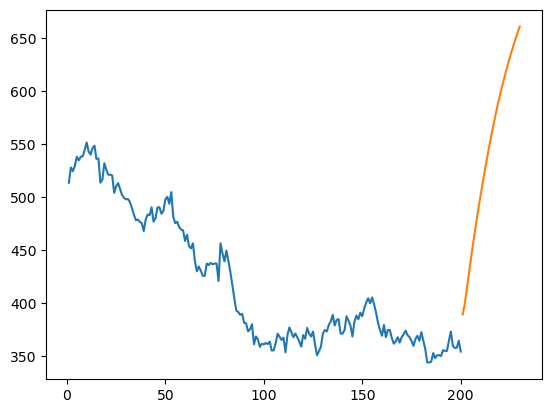

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[4711:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

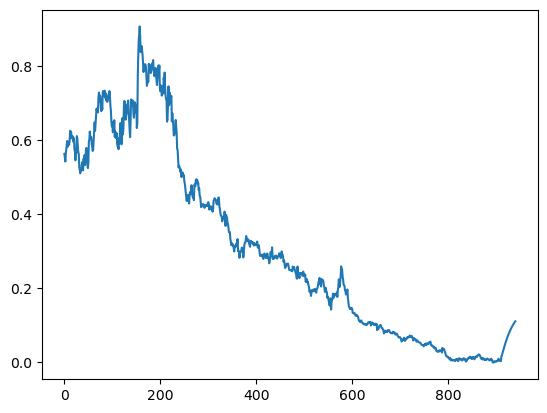

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4000:])